In [1]:
from dwave.system import LeapHybridDQMSampler
import matplotlib.pyplot as plt

In [2]:
sampler = LeapHybridDQMSampler()
time_points = sampler.properties['minimum_time_limit']

In [3]:
print(time_points)
num_var = [p[0] / 14 for p in time_points]
min_time = [p[1] for p in time_points]

[[20000, 5.0], [100000, 6.0], [200000, 13.0], [500000, 34.0], [1000000, 71.0], [2000000, 152.0], [5000000, 250.0], [20000000, 400.0], [250000000, 1200.0]]


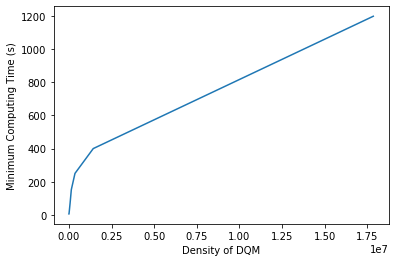

In [6]:
plt.plot(num_var, min_time)
plt.xlabel('Density of DQM')
plt.ylabel('Minimum Computing Time (s)')
plt.savefig('../80_Figures/04_Validation/minimum_computing_time_dqm_hybrid.png')

In [14]:
cd ../../Experiments

/mnt/b/Projects/Uni/BachelorThesis/Experiments


In [15]:
from UCP.unit_commitment_problem import ExperimentParameters
from Data.build_ucp import build_ucp
from Annealing_DQM.dqm import UCP_DQM

In [17]:
size = []
min_time = []

for i in range(2, 201, 2):
    size.append(i)

    ucp = build_ucp(ExperimentParameters(i, 4))
    dqm = UCP_DQM(ucp)
    min_time.append(sampler.min_time_limit(dqm.model))

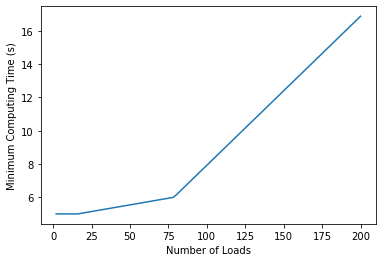

In [20]:
plt.plot(size, min_time)
plt.xlabel('Number of Loads')
plt.ylabel('Minimum Computing Time (s)')
plt.savefig('../Paper/80_Figures/04_Validation/minimum_computing_time_dqm_hybrid_200.png')